# 从头手搓-简单线性回归

In [12]:
# synthsis some datas with preset weights and bias
# create datas

import torch

def synth_datas(
    w:torch.Tensor = torch.tensor([2, -3.4], dtype=torch.float32),
    b:torch.Tensor = torch.tensor(4.2, dtype=torch.float32), 
    data_nums:int = 100000
):
    X = torch.normal(mean=0, std=0.1, size=(data_nums, w.shape[0]))
    y = X @ w.reshape(-1, 1) + b + torch.normal(mean=0, std=0.01, size=(data_nums,1))
    return X, y  

features, labels = synth_datas()
features.shape, labels.shape

(torch.Size([100000, 2]), torch.Size([100000, 1]))

In [13]:
# set datas to Datasets of PyTorch

from torch.utils import data 
import time

# datasets = data.TensorDataset(features, labels)

def iter_data(
    features:torch.tensor, 
    labels:torch.tensor, 
    batch_size:int = 100
):
    shuffle = torch.randperm(len(features)) # tensor

    for iter in range(0, len(features), batch_size):
        batch_shuffle = shuffle[iter:(iter+batch_size)]

        batch_features = features[batch_shuffle]

        batch_labels = labels[batch_shuffle]
        
        yield (batch_features, batch_labels)

start = time.time()
batch_size = 100
for iter in iter_data(features=features, labels=labels, batch_size=batch_size):
    X, y = iter
    X, y = X.to('cuda:0'), y.to('cuda:0')
    # print(X.shape, y.shape)
    # print(X,'\n',y)
    # break

stop = time.time()
print(f'The time (s) of loading datasets each epoch: {stop - start} s')
print(f'The time (s) of loading datasets each iter in a epoch: {(stop - start)/batch_size} s')

The time (s) of loading datasets each epoch: 0.06262493133544922 s
The time (s) of loading datasets each iter in a epoch: 0.0006262493133544921 s


weight =  tensor([[1.0165e-03],
        [3.5886e-06]], device='cuda:0', requires_grad=True)
weight.shape =  torch.Size([2, 1])
bias =  tensor([0.0111], device='cuda:0', requires_grad=True)
bias.shape =  torch.Size([1])
Learned weight = torch.Size([2, 1])
Learned weight = tensor([[ 1.9997],
        [-3.3996]], device='cuda:0', requires_grad=True)
Learned bias = torch.Size([1])
Learned bias = tensor([4.2000], device='cuda:0', requires_grad=True)


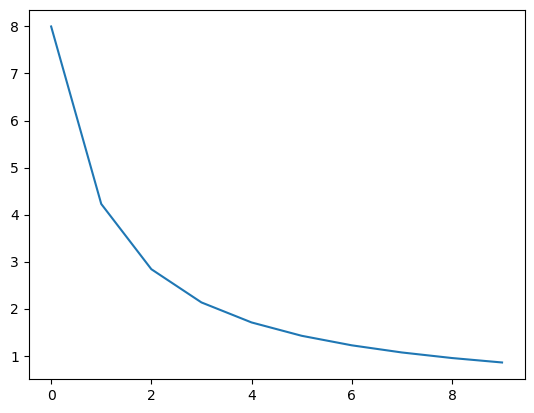

In [14]:
# Define the network structure

import torch 
import matplotlib.pyplot as plt 

def net(weight, bias, features):
    y_hat = features @ weight + bias
    return y_hat

def loss_fn(y_hat, labels):
    loss = (y_hat - labels)**2 / 2
    return loss

def update_params(params, lr=0.001, batch_size=100):
    with torch.no_grad():
        for param in params:
            # param -= (lr * param.grad)/batch_size    # 数值变小，以防后续数值不稳定
            param -= lr*param.grad/batch_size
            param.grad.zero_()

batch_size = 100
epochs = 10

# initialize the weiht with normal
weight = torch.normal(mean=0, std=0.01, size=(2, 1), dtype=torch.float32, requires_grad=True, device='cuda:0')
print('weight = ', weight)
print('weight.shape = ', weight.shape)
bias = torch.normal(mean=0, std=0.01, size=(1,), dtype=torch.float32, requires_grad=True, device='cuda:0')
print('bias = ', bias)
print('bias.shape = ', bias.shape)

loss_in_epoch = []
loss_in_epochs = []
for epoch in range(epochs):
    for iter in iter_data(features=features, labels=labels, batch_size=100):
        X, y = iter
        X, y = X.to('cuda:0'), y.to('cuda:0')
        y_hat = net(features=X, weight=weight, bias=bias)
        loss = loss_fn(y_hat, y)
        loss.sum().backward()   # 必须是标量才能求导，loss.sum()变成标量
        update_params(params=[weight, bias], lr=0.1, batch_size=batch_size)
        # print(f'loss: {loss.detach().numpy()}')
        loss_in_epoch.append(loss.sum().detach())
    # print(loss_in_epoch)
    loss_mean_in_epoch = torch.mean(torch.tensor(loss_in_epoch))
    loss_in_epochs.append(loss_mean_in_epoch)
print('='*20)
print(f'Learned weight = {weight.shape}')
print(f'Learned weight = {weight}')
print(f'Learned bias = {bias.shape}')
print(f'Learned bias = {bias}')

plt.figure()
plt.plot(loss_in_epochs)

# PyTorch简单线性回归

In [19]:
import torch 

def synth_datas(w, b, example_nums):
    X = torch.normal(mean=0, std=0.1, size=(example_nums, w.shape[0]), dtype=torch.float32)
    y = X@w + b
    y += torch.normal(mean=0, std=0.1, size=y.shape, dtype=torch.float32)
    return X, y 

w = torch.tensor([2, -3.4], dtype=torch.float32).reshape(2, 1)  # 注意形状 (shape)
b = torch.tensor([4.2], dtype=torch.float32)
features, labels = synth_datas(w=w, b=b, example_nums=10000)
features.shape, labels.shape

(torch.Size([10000, 2]), torch.Size([10000, 1]))

1/100	loss=	tensor(0.5522)
2/100	loss=	tensor(0.1005)
3/100	loss=	tensor(0.0703)
4/100	loss=	tensor(0.0502)
5/100	loss=	tensor(0.0368)
6/100	loss=	tensor(0.0278)
7/100	loss=	tensor(0.0219)
8/100	loss=	tensor(0.0179)
9/100	loss=	tensor(0.0153)
10/100	loss=	tensor(0.0135)
11/100	loss=	tensor(0.0123)
12/100	loss=	tensor(0.0115)
13/100	loss=	tensor(0.0110)
14/100	loss=	tensor(0.0107)
15/100	loss=	tensor(0.0104)
16/100	loss=	tensor(0.0103)
17/100	loss=	tensor(0.0102)
18/100	loss=	tensor(0.0101)
19/100	loss=	tensor(0.0101)
20/100	loss=	tensor(0.0100)
21/100	loss=	tensor(0.0100)
22/100	loss=	tensor(0.0100)
23/100	loss=	tensor(0.0100)
24/100	loss=	tensor(0.0100)
25/100	loss=	tensor(0.0100)
26/100	loss=	tensor(0.0100)
27/100	loss=	tensor(0.0100)
28/100	loss=	tensor(0.0100)
29/100	loss=	tensor(0.0100)
30/100	loss=	tensor(0.0100)
31/100	loss=	tensor(0.0100)
32/100	loss=	tensor(0.0100)
33/100	loss=	tensor(0.0100)
34/100	loss=	tensor(0.0100)
35/100	loss=	tensor(0.0100)
36/100	loss=	tensor(0.0100)
3

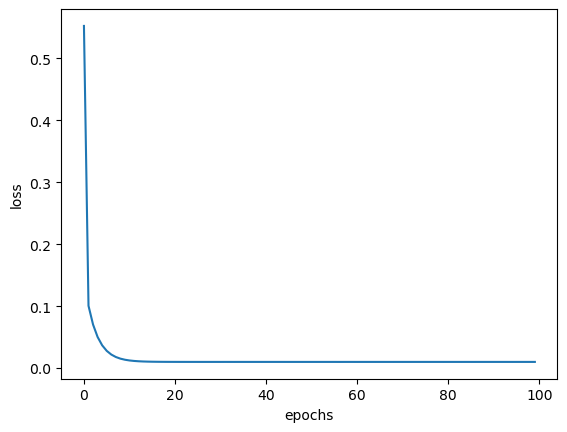

In [139]:
from torch.utils import data 
import time 
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

datasets = data.TensorDataset(features, labels)
iter_datasets = data.DataLoader(
    dataset = datasets, 
    shuffle = True, 
    batch_size = 100, 
    num_workers = 10
)

# net = nn.Sequential(nn.Linear(2, 1)).to('cuda:0')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, X):
        return self.linear(X)

net = Net()
net = net.to('cuda:0')

loss_fn = nn.MSELoss()
optimer = optim.SGD(net.parameters(), lr=0.1)

start = time.time()
epochs = 100
loss_epochs = []
for epoch in range(epochs):
    losses_in_a_epoch = []
    for iter in iter_datasets:
        X, y = iter
        X, y = X.to('cuda:0'), y.to('cuda:0')
        y_hat = net(X)
        loss = loss_fn(y_hat, y)
        optimer.zero_grad()
        loss.backward()
        optimer.step()
        losses_in_a_epoch.append(loss.detach())
    loss_mean = torch.mean(torch.tensor(losses_in_a_epoch))
    print(f'{epoch+1}/{epochs}', 'loss=', loss_mean, sep='\t')
    loss_epochs.append(loss_mean)
# print(f'learned_weight: {net[0].weight.data}')
# print(f'learned_bias: {net[0].bias.data}')
print(f'learned_weight: {net.linear.weight.data}')
print(f'learned_bias: {net.linear.bias.data}')
plt.figure()
plt.plot(loss_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
stop = time.time()
print(f'Total time: {stop - start} s.')

# PyTorch lightning

- 官方教程：[https://lightning.ai/docs/pytorch/stable/expertise_levels.html](https://lightning.ai/docs/pytorch/stable/expertise_levels.html)

In [1]:
# synthsis some datas with preset weights and bias
# create datas

import torch

def synth_datas(
    w:torch.Tensor = torch.tensor([2, -3.4], dtype=torch.float32),
    b:torch.Tensor = torch.tensor(4.2, dtype=torch.float32), 
    data_nums:int = 100000
):
    X = torch.normal(mean=0, std=0.1, size=(data_nums, w.shape[0]))
    y = X @ w.reshape(-1, 1) + b + torch.normal(mean=0, std=0.01, size=(data_nums,1))
    return X, y  

features, labels = synth_datas()
features.shape, labels.shape

(torch.Size([100000, 2]), torch.Size([100000, 1]))

In [2]:
import torch 
from torch.utils import data
from torch import nn, optim
import lightning as L

######################################################
# 1. Datasets module (data.py)
######################################################
datasets = data.TensorDataset(features, labels)
iter_datasets = data.DataLoader(dataset=datasets, shuffle=True, batch_size=128, num_workers=10)

######################################################
# 2. Define the network structure (network.py)
######################################################
# Pre-define the network structure via torch.nn.Module
class AlphaFold2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(nn.Linear(2, 1))

    def forward(self, X):
        return self.linear(X)

######################################################
# 3. PyTorch lightning structure (lightningNetwork.py)
######################################################
class LNet(L.LightningModule):
    def __init__(self, learning_rate=0.01):
        super().__init__()
        self.save_hyperparameters()
        self.model = AlphaFold2()                       # Init the network
        self.loss_fn = nn.MSELoss()                     # Init the loss function

    def forward(self, X):   # Forward
        return self.model(X)

    def training_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = self.loss_fn(y_hat, y)             # cal. loss
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = optim.SGD(self.parameters(), lr=0.01)   # Define optimizer
        return optimizer

    def validation_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = nn.functional.mse_loss(y_hat, y)
        self.log('val_loss', loss, prog_bar=True)
        return loss

    def test_step(self, batch, batch_idx):
        X, y = batch 
        y_hat = self.forward(X)
        loss = nn.functional.mse_loss(y_hat, y)
        self.log('test_loss', loss)
        return loss

    def predict_step(self, batch, batch_idx):
        X, _ = batch 
        y_hat = self.forward(X)
        return y_hat

######################################################
# 3. init the net and start training (main.py)
######################################################
autoNet = LNet()
trainer = L.Trainer(
    # default_root_dir="./lightning_logs", # saves checkpoints to './lightning_logs' at every epoch end
    limit_train_batches=1, 
    max_epochs=5, 
    devices=1, 
    accelerator="gpu", 
    # log_every_n_steps=1,
    # profiler="simple"
)

## training and validation
## 可以单独进行validation
trainer.fit(model=autoNet, train_dataloaders=iter_datasets, val_dataloaders=iter_datasets)
# trainer.validate(model=autoNet, dataloaders=iter_datasets)    

## The test set is NOT used during training, 
## it is ONLY used once the model has been trained to see how the model will do in the real-world.
# trainer.test(model=autoNet, dataloaders=iter_datasets)

## prediction
# trainer.predict(model=autoNet, dataloaders=iter_datasets)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/logger_connector/logger_connector.py:75: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `lightning.pytorch` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default
`Trainer(limit_train_batches=1)` was configured so 1 batch per epoch will be used.
You are using a CUDA device ('NVIDIA A100-SXM4-40GB') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read 

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:475: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.


/bmp/backup/zhaosy/miniconda3/envs/pytorch/lib/python3.12/site-packages/lightning/pytorch/loops/fit_loop.py:298: The number of training batches (1) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


Epoch 4: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s, v_num=21, train_loss=12.50, val_loss=12.20]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 1/1 [00:03<00:00,  0.33it/s, v_num=21, train_loss=12.50, val_loss=12.20]


In [109]:
checkpoint = './lightning_logs/version_0/checkpoints/epoch=14-step=15.ckpt'
trained_model = LNet.load_from_checkpoint(checkpoint, map_location='cpu')

# disable randomness, dropout, etc...
trained_model.eval()
y_hat = trained_model(features)                 # map_location='cpu', run on cpu device
# y_hat = trained_model(features.to('cuda:0'))  # default mode trained on gpu, so copy 'features' to gpu, then predict
y_hat

tensor([[1.3291],
        [1.2935],
        [1.3648],
        ...,
        [1.2325],
        [1.3725],
        [1.3493]], grad_fn=<AddmmBackward0>)

# 调试

# 手搓简单RNN

In [36]:
import torch 
from torch import nn 
from torch.nn import functional as F 


class SimpleRNN(nn.Module):
    def __init__(self,
                 vocab_size:int,
                 num_hiddens:int,
                 bidirectional:bool=False,
                 batch_size:int=2):
        super().__init__()
        self.vocab_size = vocab_size
        self.num_hiddens = num_hiddens 
        self.bidirectional = bidirectional
        self.batch_size = batch_size
        self.rnn = nn.RNN(
            input_size=vocab_size,
            hidden_size=num_hiddens,
            num_layers=1,
            bidirectional=False,
            # batch_first=True
        )
        self.state = self.begin_state(batch_size=batch_size, num_hiddens=num_hiddens)

    def begin_state(self, batch_size:int, num_hiddens:int):
        return torch.zeros(1, batch_size, num_hiddens)
    
    def forward(self, X):
        X = F.one_hot(X.T.long(), self.vocab_size).type(torch.float32)
        y, new_state = self.rnn(X, self.state)
        return y, new_state
    

batch_size, num_steps = 2, 5

simple_rnn = SimpleRNN(vocab_size=10, num_hiddens=8, batch_size=2)
# simple_rnn.state.shape

input = torch.zeros(size=(batch_size, num_steps))
# input
# y, new_state = simple_rnn(X=input)
# y.shape, new_state.shape
simple_rnn(X=input)

(tensor([[[-6.0505e-03, -3.8793e-02, -5.1823e-02, -1.9374e-02,  4.8840e-01,
            3.1120e-02,  3.6084e-02, -5.4570e-02],
          [-6.0505e-03, -3.8793e-02, -5.1823e-02, -1.9374e-02,  4.8840e-01,
            3.1120e-02,  3.6084e-02, -5.4570e-02]],
 
         [[ 1.2051e-01, -3.9032e-02,  5.2801e-02, -1.7249e-01,  3.7712e-01,
           -1.5334e-02, -5.3980e-02,  2.7744e-02],
          [ 1.2051e-01, -3.9032e-02,  5.2801e-02, -1.7249e-01,  3.7712e-01,
           -1.5334e-02, -5.3980e-02,  2.7744e-02]],
 
         [[ 6.4941e-02, -8.3277e-02,  6.0191e-02, -1.6257e-01,  3.2829e-01,
           -4.7902e-02, -1.1685e-02,  3.2960e-03],
          [ 6.4941e-02, -8.3277e-02,  6.0191e-02, -1.6257e-01,  3.2829e-01,
           -4.7902e-02, -1.1685e-02,  3.2960e-03]],
 
         [[ 4.6138e-02, -4.8116e-02,  4.9812e-02, -1.2715e-01,  3.5000e-01,
           -6.3343e-02, -7.0790e-03,  7.5877e-03],
          [ 4.6138e-02, -4.8116e-02,  4.9812e-02, -1.2715e-01,  3.5000e-01,
           -6.3343e-02, -7

# RNN的训练

- datas

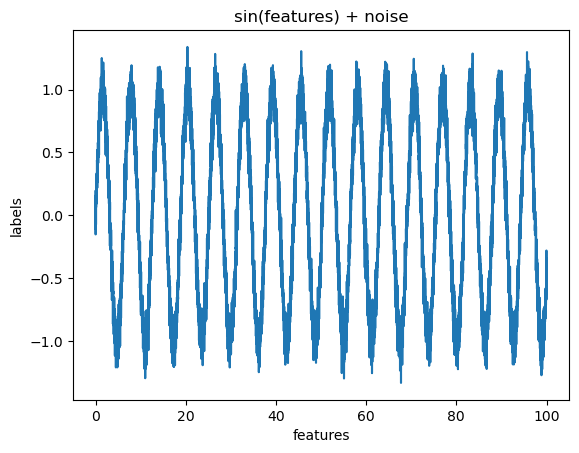

In [101]:
import torch 
import matplotlib.pyplot as plt  

max_tokens = 100
features = torch.arange(0,max_tokens, step=0.01) 
labels = torch.sin(features) + torch.randn(len(features))*0.1

plt.figure()
plt.plot(features, labels)
plt.xlabel('features')
plt.ylabel('labels')
plt.title('sin(features) + noise')
plt.show()

In [102]:
import random
import torch 


def seq_data_iter_sequential(corpus, batch_size, num_steps):  #@save
    """使用顺序分区生成一个小批量子序列"""
    # 从随机偏移量开始划分序列
    offset = random.randint(0, num_steps)   # 生成一个随机偏移量 offset，范围在 0 到 num_steps 之间。这样做的目的是为了随机化数据的起始位置，避免模型过于依赖数据的开始部分，提高泛化能力。
    num_tokens = ((len(corpus) - offset - 1) // batch_size) * batch_size  # 计算可以形成完整批次的序列长度
    Xs = torch.tensor(corpus[offset: offset + num_tokens])  # 提取 X 序列
    Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])  # 提取 Y 序列
    Xs, Ys = Xs.reshape(batch_size, -1), Ys.reshape(batch_size, -1)  # 重塑形状
    num_batches = Xs.shape[1] // num_steps  # 计算批次数
    for i in range(0, num_steps * num_batches, num_steps):
        X = Xs[:, i: i + num_steps]
        Y = Ys[:, i: i + num_steps]
        yield X, Y


for X,y in seq_data_iter_sequential(corpus=labels, batch_size=2, num_steps=20):
    print(X, y, sep='\n')
    break

tensor([[ 0.2912,  0.0903,  0.2319,  0.1093,  0.3330,  0.2177,  0.2432,  0.2468,
          0.2549,  0.2833,  0.2092,  0.4371,  0.3482,  0.4262,  0.4387,  0.5191,
          0.3906,  0.3901,  0.3575,  0.2173],
        [ 0.0996, -0.1808, -0.1249, -0.1622, -0.1225,  0.0120, -0.0461, -0.0282,
         -0.0163, -0.0465,  0.0304, -0.0080,  0.0168,  0.0503, -0.0564, -0.1174,
          0.1410, -0.0559, -0.0696, -0.0460]])
tensor([[ 0.0903,  0.2319,  0.1093,  0.3330,  0.2177,  0.2432,  0.2468,  0.2549,
          0.2833,  0.2092,  0.4371,  0.3482,  0.4262,  0.4387,  0.5191,  0.3906,
          0.3901,  0.3575,  0.2173,  0.3285],
        [-0.1808, -0.1249, -0.1622, -0.1225,  0.0120, -0.0461, -0.0282, -0.0163,
         -0.0465,  0.0304, -0.0080,  0.0168,  0.0503, -0.0564, -0.1174,  0.1410,
         -0.0559, -0.0696, -0.0460,  0.0692]])


/tmp/ipykernel_1485845/2262505998.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = torch.tensor(corpus[offset: offset + num_tokens])  # 提取 X 序列
/tmp/ipykernel_1485845/2262505998.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])  # 提取 Y 序列


- model

In [103]:
import torch 
from torch import nn 
from torch.nn import functional as F 


class LSTMModel(nn.Module):
    def __init__(self, vocab_size:int, num_hiddens:int, num_layers:int, batch_size:int):
        super().__init__()
        self.vocab_size = vocab_size 
        self.num_hiddens = num_hiddens 
        self.num_layers = num_layers 
        self.rnn = nn.LSTM(
            input_size=vocab_size,
            hidden_size=num_hiddens,
            num_layers=num_layers,
            batch_first=True
        )

        # self.hidden_state, self.cell_state = self.begin_state(num_layers=num_layers, batch_size=batch_size, num_hiddens=num_hiddens)
        self.fc = nn.Linear(num_hiddens, vocab_size)

    def begin_state(self, num_layers:int, batch_size:int, num_hiddens:int):
        return (torch.zeros(size=(num_layers, batch_size, num_hiddens)),
                torch.zeros(size=(num_layers, batch_size, num_hiddens)))
    
    def forward(self, X, hidden_state, cell_state):
        y, new_state = self.rnn(X, (hidden_state, cell_state))
        y = self.fc(y)
        return y, new_state
    

# test
batch_size, num_steps = 2, 5

lstm_model = LSTMModel(vocab_size=1, num_hiddens=128, num_layers=1, batch_size=2)
hidden_state, cell_state = lstm_model.begin_state(num_layers=1, batch_size=2, num_hiddens=128)

input = torch.zeros(size=(batch_size, num_steps))
input = input.unsqueeze(dim=2)
input.shape

y_hat, hiddens = lstm_model(X=input, hidden_state=hidden_state, cell_state=cell_state)
y_hat.shape, hiddens[0].shape, hiddens[1].shape


(torch.Size([2, 5, 1]), torch.Size([1, 2, 128]), torch.Size([1, 2, 128]))

- train

/tmp/ipykernel_1485845/2262505998.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Xs = torch.tensor(corpus[offset: offset + num_tokens])  # 提取 X 序列
/tmp/ipykernel_1485845/2262505998.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Ys = torch.tensor(corpus[offset + 1: offset + 1 + num_tokens])  # 提取 Y 序列


1/200	loss=	tensor(3274.4055)
2/200	loss=	tensor(3163.0242)
3/200	loss=	tensor(3006.3921)
4/200	loss=	tensor(2882.7327)
5/200	loss=	tensor(2769.1587)
6/200	loss=	tensor(2687.0513)
7/200	loss=	tensor(2608.3184)
8/200	loss=	tensor(2547.4236)
9/200	loss=	tensor(2488.2197)
10/200	loss=	tensor(2418.8062)
11/200	loss=	tensor(2356.8972)
12/200	loss=	tensor(2310.4814)
13/200	loss=	tensor(2252.4038)
14/200	loss=	tensor(2201.0571)
15/200	loss=	tensor(2155.5942)
16/200	loss=	tensor(2100.6152)
17/200	loss=	tensor(2051.9087)
18/200	loss=	tensor(1997.3494)
19/200	loss=	tensor(1953.0667)
20/200	loss=	tensor(1908.1371)
21/200	loss=	tensor(1860.8186)
22/200	loss=	tensor(1817.5012)
23/200	loss=	tensor(1771.3633)
24/200	loss=	tensor(1726.9651)
25/200	loss=	tensor(1685.7875)
26/200	loss=	tensor(1645.3801)
27/200	loss=	tensor(1602.5425)
28/200	loss=	tensor(1564.7701)
29/200	loss=	tensor(1521.1113)
30/200	loss=	tensor(1481.2296)
31/200	loss=	tensor(1452.6472)
32/200	loss=	tensor(1404.2412)
33/200	loss=	tens

Text(0.5, 1.0, 'loss in epochs')

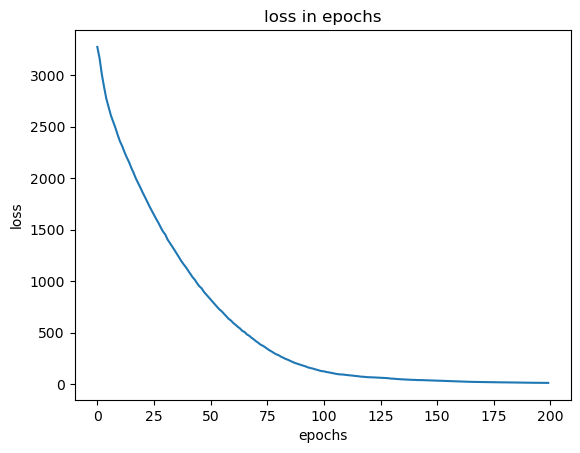

In [104]:
from torch import nn, optim 
from torch.nn import functional as F 
from torch.nn import DataParallel
from torch import utils


device = ['cuda:1']
batch_size = 32
num_hiddens = 64
num_layers = 2
num_steps = 30
lr = 0.001
epochs = 200


model = LSTMModel(vocab_size=1, num_hiddens=num_hiddens, num_layers=num_layers, batch_size=batch_size).to(device[0])
# model = DataParallel(model)

# loss_fn = nn.CrossEntropyLoss()
loss_fn = nn.MSELoss()
optimer = optim.Adam(model.parameters(), lr=lr)
# optimer = optim.SGD(model.parameters(), lr=lr)

loss_in_epochs = []
for epoch in range(epochs):   
    loss_in_epoch = []
    for X, y in seq_data_iter_sequential(corpus=features, batch_size=batch_size, num_steps=num_steps):
        # print(X.shape, y.shape)
        # X = X.unsqueeze(dim=2).to(device[0])
        # y = y.unsqueeze(dim=2).to(device[0])
        X = X.reshape(batch_size, num_steps, 1).to(device[0])
        y = y.reshape(batch_size, num_steps, 1).to(device[0])
        hidden_state, cell_state = model.begin_state(num_layers=num_layers, batch_size=batch_size, num_hiddens=num_hiddens)
        hidden_state, cell_state = hidden_state.to(device[0]), cell_state.to(device[0])
        y_hat, hidden = model(X, hidden_state, cell_state)
        l = loss_fn(y_hat, y)
        optimer.zero_grad()
        l.backward()
        # 防止梯度爆炸
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimer.step()
        loss_in_epoch.append(l.detach())
    loss_mean = torch.mean(torch.tensor(loss_in_epoch))
    loss_in_epochs.append(loss_mean)
    print(f'{epoch+1}/{epochs}', 'loss=', loss_mean, sep='\t')

plt.figure()
plt.plot(loss_in_epochs)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss in epochs')

/tmp/ipykernel_1485845/1588576731.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_hat, hiddens = model(torch.tensor(labels[i]).reshape(1,1,1).to(device[0]), hiddens[0], hiddens[1])
/tmp/ipykernel_1485845/1588576731.py:23: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  _, hiddens = model(torch.tensor(outputs1[-1]).reshape(1,1,1).to(device[0]), hiddens[0], hiddens[1])
/tmp/ipykernel_1485845/1588576731.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_hat, hiddens = model(torch.tensor(outputs1[-1]).reshape(1,1,1).to(device[0]), hid

Text(0.5, 1.0, 'outputs in steps')

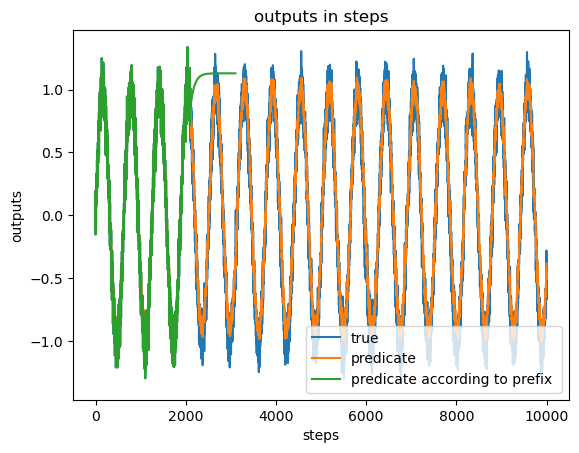

In [113]:
model.eval()
with torch.no_grad():
    # 初始化隐藏状态和细胞状态
    hiddens = model.begin_state(num_layers=num_layers, batch_size=1, num_hiddens=num_hiddens)
    hiddens = (hiddens[0].to(device[0]), hiddens[1].to(device[0]))

    outputs = []
    for i in range(len(labels)):
        y_hat, hiddens = model(torch.tensor(labels[i]).reshape(1,1,1).to(device[0]), hiddens[0], hiddens[1])
        outputs.append(y_hat.reshape(-1)[-1].item())
        # print(f'hiddens: {hiddens[0]}')


    # 重新初始化隐藏状态和细胞状态
    hiddens = model.begin_state(num_layers=num_layers, batch_size=1, num_hiddens=num_hiddens)
    hiddens = (hiddens[0].to(device[0]), hiddens[1].to(device[0]))
    
    prefix = labels[0:2100]
    outputs1 = []
    outputs1.append(prefix[0])
    # warm-up
    for y in prefix[1:]:
        _, hiddens = model(torch.tensor(outputs1[-1]).reshape(1,1,1).to(device[0]), hiddens[0], hiddens[1])
        outputs1.append(y)
        # print(f'outputs1: {outputs1}')

    for _ in range(1000):
        y_hat, hiddens = model(torch.tensor(outputs1[-1]).reshape(1,1,1).to(device[0]), hiddens[0], hiddens[1])
        outputs1.append(y_hat.reshape(-1)[-1].item())


plt.figure()
plt.plot(labels, label='true')
plt.plot(outputs, label='predicate')
plt.plot(outputs1, label='predicate according to prefix ')
plt.xlabel('steps')
plt.ylabel('outputs')
plt.legend()
plt.title('outputs in steps')

# BERT

In [1]:
#@tab all
#@save
def get_tokens_and_segments(tokens_a, tokens_b=None):
    """
    Get tokens of the BERT input sequence and their segment IDs.
    Args:
        tokens_a: List[str] 第一段文本的词元列表（即第一句话的分词结果）。
        tokens_b: List[str] （可选）第二段文本的词元列表（即第二句话的分词结果）。在单句任务中，此参数可以省略。
    Returns:
        tokens: List[str] 词元列表，其中第一个词元是'<cls>'，表示序列的开始，最后一个词元是'<sep>'，表示序列的结束。
        segments: List[int] 段标识列表，其中0表示第一段，1表示第二段。
    """
    # classification (cls) and separator (sep) tokens are added
    tokens = ['<cls>'] + tokens_a + ['<sep>']
    # 0 and 1 are marking segment A and B, respectively
    segments = [0] * (len(tokens_a) + 2)
    if tokens_b is not None:
        tokens += tokens_b + ['<sep>']
        segments += [1] * (len(tokens_b) + 1)
    return tokens, segments


# 测试
tokens_a = ['You', 'are', 'the', 'best']
tokens_b = ['You', 'are', 'the', 'worst']

tokens, segments = get_tokens_and_segments(tokens_a, tokens_b)

tokens, segments

(['<cls>',
  'You',
  'are',
  'the',
  'best',
  '<sep>',
  'You',
  'are',
  'the',
  'worst',
  '<sep>'],
 [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [2]:
from torch import nn 
import torch 
from d2l import torch as d2l


#@tab pytorch
#@save
class BERTEncoder(nn.Module):
    """BERT encoder."""
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, max_len=1000, key_size=768, query_size=768, value_size=768, **kwargs):
        super(BERTEncoder, self).__init__(**kwargs)
        self.token_embedding = nn.Embedding(vocab_size, num_hiddens)
        self.segment_embedding = nn.Embedding(2, num_hiddens)
        self.blks = nn.Sequential()
        for i in range(num_layers):
            # 此处调用TransformerEncoder中的EncoderBlock
            self.blks.add_module(f"{i}", d2l.EncoderBlock(key_size, query_size, value_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, dropout, True))
        # In BERT, positional embeddings are learnable, thus we create a
        # parameter of positional embeddings that are long enough
        # 此处用nn.Parameter来创建一个可学习的参数，用于存储位置编码, 形状为(1, max_len, num_hiddens)
        self.pos_embedding = nn.Parameter(torch.randn(1, max_len, num_hiddens))

    def forward(self, tokens, segments, valid_lens):
        # Shape of `X` remains unchanged in the following code snippet:
        # (batch size, max sequence length, `num_hiddens`)
        # 词元嵌入和段嵌入相加
        # (batch_size, seq_len, num_hiddens) + (batch_size, seq_len, num_hiddens) = (batch_size, seq_len, num_hiddens)
        X = self.token_embedding(tokens) + self.segment_embedding(segments)
        # 位置编码
        # (batch_size, seq_len, num_hiddens) + (1, seq_len, num_hiddens) = (batch_size, seq_len, num_hiddens)
        X = X + self.pos_embedding.data[:, :X.shape[1], :]
        for blk in self.blks:
            X = blk(X, valid_lens)
        # X: (batch_size, seq_len, num_hiddens)
        return X
    

# 测试
#@tab pytorch
vocab_size, num_hiddens, ffn_num_hiddens, num_heads = 10000, 768, 1024, 4
norm_shape, ffn_num_input, num_layers, dropout = [768], 768, 2, 0.2
encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout)

#@tab pytorch
batch_size = 2
seq_len = 8

tokens = torch.randint(low=0, high=vocab_size, size=(batch_size, seq_len))
segments = torch.tensor([[0, 0, 0, 0, 1, 1, 1, 1], [0, 0, 0, 1, 1, 1, 1, 1]])
encoded_X = encoder(tokens, segments, None)

tokens.shape, segments.shape, encoded_X.shape

(torch.Size([2, 8]), torch.Size([2, 8]), torch.Size([2, 8, 768]))

In [3]:
#@tab pytorch
#@save
class MaskLM(nn.Module):
    """The masked language model task of BERT."""
    def __init__(self, vocab_size, num_hiddens, num_inputs=768, **kwargs):
        super(MaskLM, self).__init__(**kwargs)
        self.mlp = nn.Sequential(nn.Linear(num_inputs, num_hiddens),
                                 nn.ReLU(),
                                 nn.LayerNorm(num_hiddens),
                                 nn.Linear(num_hiddens, vocab_size))

    def forward(self, X, pred_positions):
        num_pred_positions = pred_positions.shape[1]
        pred_positions = pred_positions.reshape(-1)
        batch_size = X.shape[0]
        batch_idx = torch.arange(0, batch_size)
        # Suppose that `batch_size` = 2, `num_pred_positions` = 3, then
        # `batch_idx` is `torch.tensor([0, 0, 0, 1, 1, 1])`
        batch_idx = torch.repeat_interleave(batch_idx, num_pred_positions)
        masked_X = X[batch_idx, pred_positions]
        masked_X = masked_X.reshape((batch_size, num_pred_positions, -1))
        mlm_Y_hat = self.mlp(masked_X)
        return mlm_Y_hat
    

# 测试
#@tab pytorch
mlm = MaskLM(vocab_size, num_hiddens)
mlm_positions = torch.tensor([[1, 5, 2], [6, 1, 5]])
mlm_Y_hat = mlm(encoded_X, mlm_positions)

mlm_Y_hat.shape

torch.Size([2, 3, 10000])

In [4]:
#@tab pytorch
#@save
class NextSentencePred(nn.Module):
    """The next sentence prediction task of BERT."""
    def __init__(self, num_inputs, **kwargs):
        super(NextSentencePred, self).__init__(**kwargs)
        self.output = nn.Linear(num_inputs, 2)

    def forward(self, X):
        # `X` shape: (batch size, `num_hiddens`)
        return self.output(X)
    

# 测试
# PyTorch by default won't flatten the tensor as seen in mxnet where, if
# flatten=True, all but the first axis of input data are collapsed together
encoded_X = torch.flatten(encoded_X, start_dim=1)
# input_shape for NSP: (batch size, `num_hiddens`)
nsp = NextSentencePred(encoded_X.shape[-1])
nsp_Y_hat = nsp(encoded_X)
nsp_Y_hat.shape

torch.Size([2, 2])

In [5]:
#@tab pytorch
#@save
class BERTModel(nn.Module):
    """The BERT model."""
    def __init__(self, vocab_size, num_hiddens, norm_shape, ffn_num_input,
                 ffn_num_hiddens, num_heads, num_layers, dropout,
                 max_len=1000, key_size=768, query_size=768, value_size=768,
                 hid_in_features=768, mlm_in_features=768,
                 nsp_in_features=768):
        super(BERTModel, self).__init__()
        self.encoder = BERTEncoder(vocab_size, num_hiddens, norm_shape, ffn_num_input, ffn_num_hiddens, num_heads, num_layers, dropout, max_len=max_len, key_size=key_size, query_size=query_size, value_size=value_size)
        self.hidden = nn.Sequential(nn.Linear(hid_in_features, num_hiddens), nn.Tanh())
        self.mlm = MaskLM(vocab_size, num_hiddens, mlm_in_features)
        self.nsp = NextSentencePred(nsp_in_features)

    def forward(self, tokens, segments, valid_lens=None, pred_positions=None):
        encoded_X = self.encoder(tokens, segments, valid_lens)
        if pred_positions is not None:
            mlm_Y_hat = self.mlm(encoded_X, pred_positions)
        else:
            mlm_Y_hat = None
        # The hidden layer of the MLP classifier for next sentence prediction.
        # 0 is the index of the '<cls>' token
        nsp_Y_hat = self.nsp(self.hidden(encoded_X[:, 0, :]))
        return encoded_X, mlm_Y_hat, nsp_Y_hat
    

# 测试


In [7]:
import pandas as pd 
import os 
import random


#@tab all
#@save
d2l.DATA_HUB['wikitext-2'] = (
    'https://s3.amazonaws.com/research.metamind.io/wikitext/'
    'wikitext-2-v1.zip', '3c914d17d80b1459be871a5039ac23e752a53cbe')

#@save
def _read_wiki(data_dir):
    # file_name = os.path.join(data_dir, 'wiki.train.tokens')
    # with open(file_name, 'r') as f:
    #     lines = f.readlines()
    file_name = os.path.join(data_dir, 'train-00000-of-00001.parquet')
    df = pd.read_parquet(data_dir)
    lines = df['text'].tolist()
    # 大写字母转换为小写字母
    paragraphs = [line.strip().lower().split(' . ')
                  for line in lines if len(line.split(' . ')) >= 2]
    random.shuffle(paragraphs)
    return paragraphs

#@tab all
#@save
def _get_next_sentence(sentence, next_sentence, paragraphs):
    if random.random() < 0.5:
        is_next = True
    else:
        # paragraphs是三重列表的嵌套
        next_sentence = random.choice(random.choice(paragraphs))
        is_next = False
    return sentence, next_sentence, is_next

#@tab all
#@save
def _get_nsp_data_from_paragraph(paragraph, paragraphs, vocab, max_len):
    nsp_data_from_paragraph = []
    for i in range(len(paragraph) - 1):
        tokens_a, tokens_b, is_next = _get_next_sentence(
            paragraph[i], paragraph[i + 1], paragraphs)
        # 考虑1个'<cls>'词元和2个'<sep>'词元
        if len(tokens_a) + len(tokens_b) + 3 > max_len:
            continue
        tokens, segments = d2l.get_tokens_and_segments(tokens_a, tokens_b)
        nsp_data_from_paragraph.append((tokens, segments, is_next))
    return nsp_data_from_paragraph

#@tab all
#@save
def _replace_mlm_tokens(tokens, candidate_pred_positions, num_mlm_preds,
                        vocab):
    # 为遮蔽语言模型的输入创建新的词元副本，其中输入可能包含替换的“<mask>”或随机词元
    mlm_input_tokens = [token for token in tokens]
    pred_positions_and_labels = []
    # 打乱后用于在遮蔽语言模型任务中获取15%的随机词元进行预测
    random.shuffle(candidate_pred_positions)
    for mlm_pred_position in candidate_pred_positions:
        if len(pred_positions_and_labels) >= num_mlm_preds:
            break
        masked_token = None
        # 80%的时间：将词替换为“<mask>”词元
        if random.random() < 0.8:
            masked_token = '<mask>'
        else:
            # 10%的时间：保持词不变
            if random.random() < 0.5:
                masked_token = tokens[mlm_pred_position]
            # 10%的时间：用随机词替换该词
            else:
                masked_token = random.choice(vocab.idx_to_token)
        mlm_input_tokens[mlm_pred_position] = masked_token
        pred_positions_and_labels.append(
            (mlm_pred_position, tokens[mlm_pred_position]))
    return mlm_input_tokens, pred_positions_and_labels

#@tab all
#@save
def _get_mlm_data_from_tokens(tokens, vocab):
    candidate_pred_positions = []
    # tokens是一个字符串列表
    for i, token in enumerate(tokens):
        # 在遮蔽语言模型任务中不会预测特殊词元
        if token in ['<cls>', '<sep>']:
            continue
        candidate_pred_positions.append(i)
    # 遮蔽语言模型任务中预测15%的随机词元
    num_mlm_preds = max(1, round(len(tokens) * 0.15))
    mlm_input_tokens, pred_positions_and_labels = _replace_mlm_tokens(
        tokens, candidate_pred_positions, num_mlm_preds, vocab)
    pred_positions_and_labels = sorted(pred_positions_and_labels,
                                       key=lambda x: x[0])
    pred_positions = [v[0] for v in pred_positions_and_labels]
    mlm_pred_labels = [v[1] for v in pred_positions_and_labels]
    return vocab[mlm_input_tokens], pred_positions, vocab[mlm_pred_labels]

#@tab pytorch
#@save
def _pad_bert_inputs(examples, max_len, vocab):
    max_num_mlm_preds = round(max_len * 0.15)
    all_token_ids, all_segments, valid_lens,  = [], [], []
    all_pred_positions, all_mlm_weights, all_mlm_labels = [], [], []
    nsp_labels = []
    for (token_ids, pred_positions, mlm_pred_label_ids, segments,
         is_next) in examples:
        all_token_ids.append(torch.tensor(token_ids + [vocab['<pad>']] * (
            max_len - len(token_ids)), dtype=torch.long))
        all_segments.append(torch.tensor(segments + [0] * (
            max_len - len(segments)), dtype=torch.long))
        # valid_lens不包括'<pad>'的计数
        valid_lens.append(torch.tensor(len(token_ids), dtype=torch.float32))
        all_pred_positions.append(torch.tensor(pred_positions + [0] * (
            max_num_mlm_preds - len(pred_positions)), dtype=torch.long))
        # 填充词元的预测将通过乘以0权重在损失中过滤掉
        all_mlm_weights.append(
            torch.tensor([1.0] * len(mlm_pred_label_ids) + [0.0] * (
                max_num_mlm_preds - len(pred_positions)),
                dtype=torch.float32))
        all_mlm_labels.append(torch.tensor(mlm_pred_label_ids + [0] * (
            max_num_mlm_preds - len(mlm_pred_label_ids)), dtype=torch.long))
        nsp_labels.append(torch.tensor(is_next, dtype=torch.long))
    return (all_token_ids, all_segments, valid_lens, all_pred_positions,
            all_mlm_weights, all_mlm_labels, nsp_labels)

#@tab pytorch
#@save
class _WikiTextDataset(torch.utils.data.Dataset):
    def __init__(self, paragraphs, max_len):
        # 输入paragraphs[i]是代表段落的句子字符串列表；
        # 而输出paragraphs[i]是代表段落的句子列表，其中每个句子都是词元列表
        paragraphs = [d2l.tokenize(
            paragraph, token='word') for paragraph in paragraphs]
        sentences = [sentence for paragraph in paragraphs
                     for sentence in paragraph]
        self.vocab = d2l.Vocab(sentences, min_freq=5, reserved_tokens=[
            '<pad>', '<mask>', '<cls>', '<sep>'])
        # 获取下一句子预测任务的数据
        examples = []
        for paragraph in paragraphs:
            examples.extend(_get_nsp_data_from_paragraph(
                paragraph, paragraphs, self.vocab, max_len))
        # 获取遮蔽语言模型任务的数据
        examples = [(_get_mlm_data_from_tokens(tokens, self.vocab)
                      + (segments, is_next))
                     for tokens, segments, is_next in examples]
        # 填充输入
        (self.all_token_ids, self.all_segments, self.valid_lens,
         self.all_pred_positions, self.all_mlm_weights,
         self.all_mlm_labels, self.nsp_labels) = _pad_bert_inputs(
            examples, max_len, self.vocab)

    def __getitem__(self, idx):
        return (self.all_token_ids[idx], self.all_segments[idx],
                self.valid_lens[idx], self.all_pred_positions[idx],
                self.all_mlm_weights[idx], self.all_mlm_labels[idx],
                self.nsp_labels[idx])

    def __len__(self):
        return len(self.all_token_ids)
    
#@tab pytorch
#@save
def load_data_wiki(batch_size, max_len):
    """加载WikiText-2数据集"""
    num_workers = d2l.get_dataloader_workers()
    # data_dir = d2l.download_extract('wikitext-2', 'wikitext-2')
    data_dir = './data/wikipedia_text'
    paragraphs = _read_wiki(data_dir)
    train_set = _WikiTextDataset(paragraphs, max_len)
    train_iter = torch.utils.data.DataLoader(train_set, batch_size,
                                        shuffle=True, num_workers=num_workers)
    return train_iter, train_set.vocab



KeyboardInterrupt: 

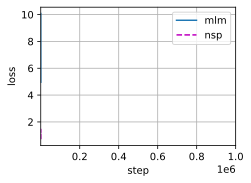

In [8]:
batch_size, max_len = 512, 64
train_iter, vocab = load_data_wiki(batch_size, max_len)

#@tab pytorch, paddle
net = BERTModel(len(vocab), num_hiddens=128, norm_shape=[128],
                    ffn_num_input=128, ffn_num_hiddens=256, num_heads=2,
                    num_layers=2, dropout=0.2, key_size=128, query_size=128,
                    value_size=128, hid_in_features=128, mlm_in_features=128,
                    nsp_in_features=128)
devices = d2l.try_all_gpus()
loss = nn.CrossEntropyLoss()

#@tab pytorch
#@save
def _get_batch_loss_bert(net, loss, vocab_size, tokens_X,
                         segments_X, valid_lens_x,
                         pred_positions_X, mlm_weights_X,
                         mlm_Y, nsp_y):
    # 前向传播
    _, mlm_Y_hat, nsp_Y_hat = net(tokens_X, segments_X,
                                  valid_lens_x.reshape(-1),
                                  pred_positions_X)
    # 计算遮蔽语言模型损失
    mlm_l = loss(mlm_Y_hat.reshape(-1, vocab_size), mlm_Y.reshape(-1)) *\
    mlm_weights_X.reshape(-1, 1)
    mlm_l = mlm_l.sum() / (mlm_weights_X.sum() + 1e-8)
    # 计算下一句子预测任务的损失
    nsp_l = loss(nsp_Y_hat, nsp_y)
    l = mlm_l + nsp_l
    return mlm_l, nsp_l, l

#@tab pytorch
def train_bert(train_iter, net, loss, vocab_size, devices, num_steps):
    net = nn.DataParallel(net, device_ids=devices).to(devices[0])
    trainer = torch.optim.Adam(net.parameters(), lr=0.01)
    step, timer = 0, d2l.Timer()
    animator = d2l.Animator(xlabel='step', ylabel='loss',
                            xlim=[1, num_steps], legend=['mlm', 'nsp'])
    # 遮蔽语言模型损失的和，下一句预测任务损失的和，句子对的数量，计数
    metric = d2l.Accumulator(4)
    num_steps_reached = False
    while step < num_steps and not num_steps_reached:
        for tokens_X, segments_X, valid_lens_x, pred_positions_X,\
            mlm_weights_X, mlm_Y, nsp_y in train_iter:
            tokens_X = tokens_X.to(devices[0])
            segments_X = segments_X.to(devices[0])
            valid_lens_x = valid_lens_x.to(devices[0])
            pred_positions_X = pred_positions_X.to(devices[0])
            mlm_weights_X = mlm_weights_X.to(devices[0])
            mlm_Y, nsp_y = mlm_Y.to(devices[0]), nsp_y.to(devices[0])
            trainer.zero_grad()
            timer.start()
            mlm_l, nsp_l, l = _get_batch_loss_bert(
                net, loss, vocab_size, tokens_X, segments_X, valid_lens_x,
                pred_positions_X, mlm_weights_X, mlm_Y, nsp_y)
            l.backward()
            trainer.step()
            metric.add(mlm_l, nsp_l, tokens_X.shape[0], 1)
            timer.stop()
            animator.add(step + 1,
                         (metric[0] / metric[3], metric[1] / metric[3]))
            step += 1
            if step == num_steps:
                num_steps_reached = True
                break

    print(f'MLM loss {metric[0] / metric[3]:.3f}, '
          f'NSP loss {metric[1] / metric[3]:.3f}')
    print(f'{metric[2] / timer.sum():.1f} sentence pairs/sec on '
          f'{str(devices)}')
    

#@tab mxnet, pytorch
# train_bert(train_iter, net, loss, len(vocab), devices, 100000)
train_bert(train_iter, net, loss, len(vocab), devices, 1000000)
torch.save(net.state_dict(), 'Pytorch_params/BERT/bert_1000000.pt')